In [ ]:
pip install pandas as pd

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn 2.csv to WA_Fn-UseC_-Telco-Customer-Churn 2.csv


In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn 2.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


DATA CLEANING

In [5]:
# write the columns names in small letter and replace spaces with under score
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [7]:
strings =list(df.dtypes[df.dtypes=='object'].index)
strings

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [8]:
# Check for null or missing data
for col in df.columns:
    pct_missing =np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

customerid-0.0%
gender-0.0%
seniorcitizen-0.0%
partner-0.0%
dependents-0.0%
tenure-0.0%
phoneservice-0.0%
multiplelines-0.0%
internetservice-0.0%
onlinesecurity-0.0%
onlinebackup-0.0%
deviceprotection-0.0%
techsupport-0.0%
streamingtv-0.0%
streamingmovies-0.0%
contract-0.0%
paperlessbilling-0.0%
paymentmethod-0.0%
monthlycharges-0.0%
totalcharges-0.0%
churn-0.0%


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


DROP DUPLICATES

In [10]:
df = df.drop_duplicates()

CHECK MISSING VALUES

In [11]:
df.isna().sum().sort_values(ascending=False)

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


NUMERICAL COLUMNS

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [13]:
df[num_cols]

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


CATEGORICAL COLUMNS



In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [15]:
df[cat_cols]

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


CHECK THE NUMBER OF UNIQUE VALUES

In [16]:
df.nunique()

,0
customerid,7043
gender,2
seniorcitizen,2
partner,2
dependents,2
tenure,73
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3


DROP CUSTOMER ID

In [18]:
df.drop(columns=['customerid'], inplace=True)

FIX THE DATA TYPE

In [19]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

CONVERT BINARY COLUMNS (YES?NO TO 0/1)

In [20]:
binary_cols = [
    'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

HANDLE 'NO INTERNET/ PHONE SERVICE'VALUES

In [21]:
replace_map = {
    'no internet service': 'no',
    'no phone service': 'no'
}

service_cols = [
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines'
]

for col in service_cols:
    df[col] = df[col].replace(replace_map)


ENCODE CATEGORICAL VARIABLES

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)


FEATURE ENGINEERING (CHURN SPECIFIC)

In [23]:
df_encoded['avg_monthly_spend'] = (
    df_encoded['totalcharges'] / (df_encoded['tenure'] + 1)
)

df_encoded['long_term_customer'] = (df_encoded['tenure'] >= 24).astype(int)


FINAL VALIDATION

In [24]:
df_encoded.info()
df_encoded.isna().sum().sum()
df_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   seniorcitizen                          7043 non-null   int64  
 1   partner                                7043 non-null   int64  
 2   dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   phoneservice                           7043 non-null   int64  
 5   paperlessbilling                       7043 non-null   int64  
 6   monthlycharges                         7043 non-null   float64
 7   totalcharges                           7032 non-null   float64
 8   churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   bool   
 10  multiplelines_No phone service         7043 non-null   bool   
 11  mult

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,gender_Male,...,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,avg_monthly_spend,long_term_customer
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,True,False,14.925000,0
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,True,False,False,False,True,53.985714,1
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,True,36.050000,0
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,True,False,False,False,False,40.016304,1
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,True,False,50.550000,0


In [28]:
df_encoded.to_csv('telco_churn_cleaned.csv', index=False)


EXPLORATORY DATA ANALYSIS (EDA) CHURN INSIGHT

TARGET VARIABLE CHURN DISTRIBUTION

In [26]:
df['churn'].value_counts(normalize=True)


,proportion
churn,
0,0.73463
1,0.26537


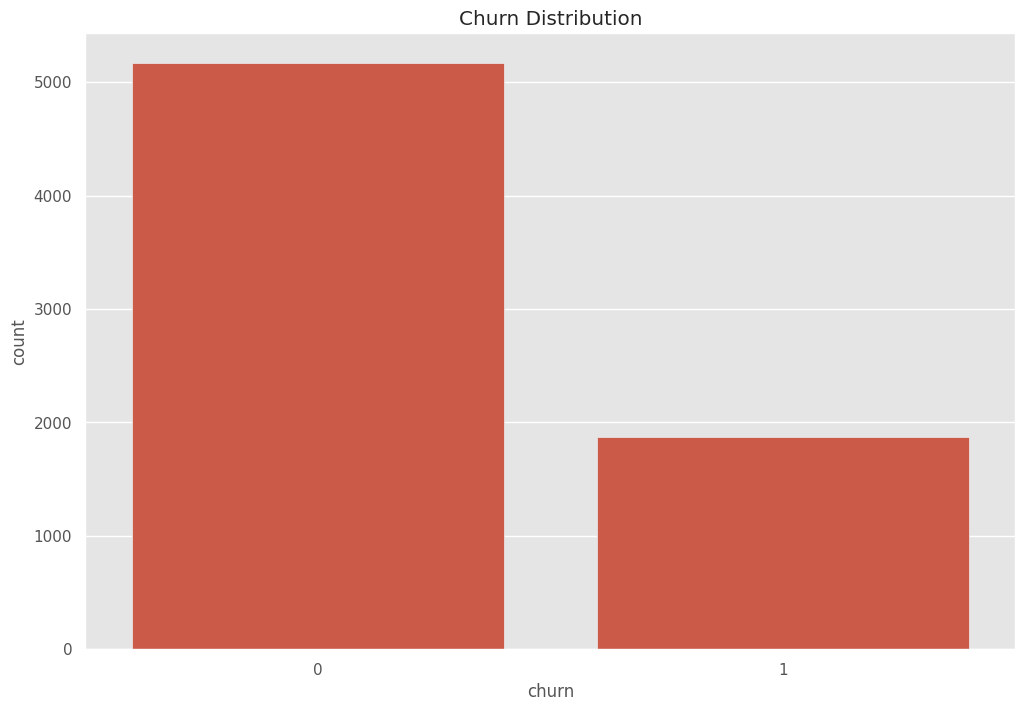

In [27]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()


Churn is imbalanced (≈ 26–27% churn)

Accuracy alone is misleading → use ROC-AUC, Recall, precicion,confussion matrix

# CHURN VS CONTRACT TYPE

In [ ]:
churn_contract = pd.crosstab(df['contract'], df['churn'], normalize='index')
churn_contract.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.show()
